Total : 90 subjects
89 subjects remaining after removing problematic subjects.
A total of 1557/9790 actions were missed. (15.90 %)
 - Loaded the task results for study 66f96c31e69227986334a027 
    (16 subjects.)
 - Loaded the task results for study 66d086503c0a69291c361b67 
    (40 subjects.)
Total : 56 subjects
55 subjects remaining after removing problematic subjects.
A total of 14/6050 actions were missed. (0.23 %)
 - Loaded the task results for study 6703ab18d345eaa4893587e0 
    (49 subjects.)
 - Loaded the task results for study 66f9aee8210357265a5958fc 
    (50 subjects.)
 - Loaded the task results for study 6703ab1a7ea30557549dc6da 
    (50 subjects.)
Total : 149 subjects
145 subjects remaining after removing problematic subjects.
A total of 33/15950 actions were missed. (0.21 %)
(289, 3)


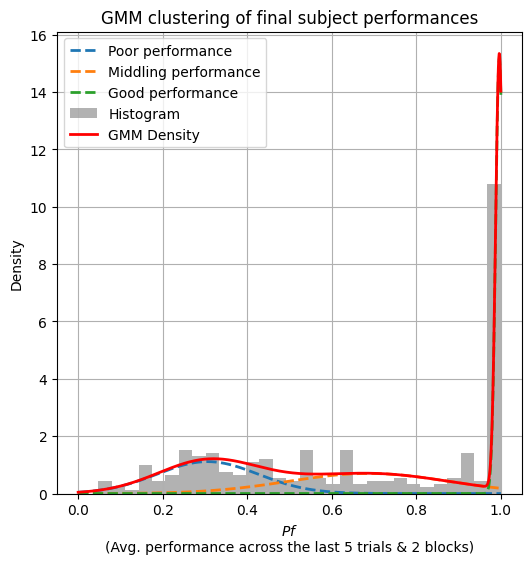

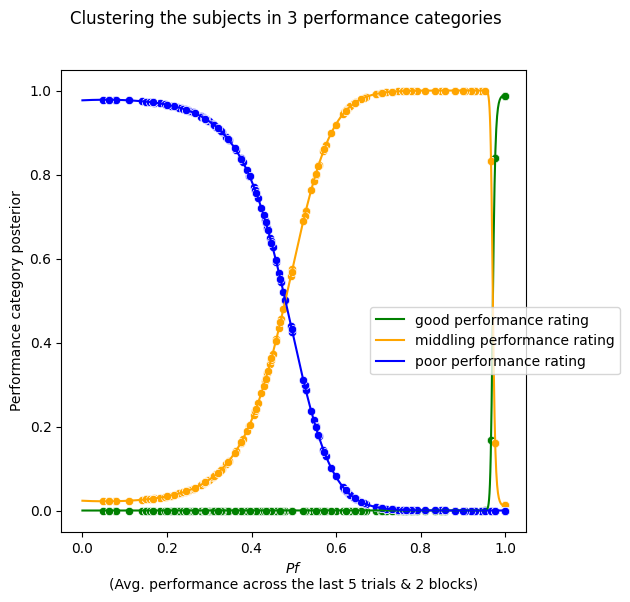

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\analysis_tools\dataframe_from_raw_data.py:348: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


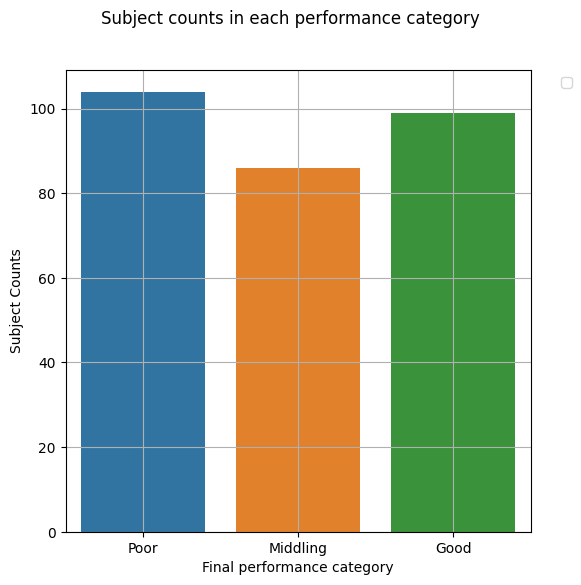

In [1]:

import sys,os
import pickle

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly as pltly
import plotly.express as px
import plotly.graph_objects as go

from sklearn.mixture import GaussianMixture

from jax import vmap
import jax.numpy as jnp

# + local functions : 
from database_handling.database_extract import get_all_subject_data_from_internal_task_id
from utils import remove_by_indices
from analysis_tools.preprocess import get_preprocessed_data_from_df
from analysis_tools.dataframe_from_raw_data import get_full_dataframe_from_raw_data

LLM_CLASSIFS_PATH = os.path.join("results","llm_classifications","29_01.data")

STUDIES_EXTRACTION_CODES = {
    "study_1" : {
        "dict_code" : "002",
        "internal_task_id" : "002",
        "studies_id" : None,
        "exclude_subjects" : ["5c9cb670b472d0001295f377"],
        "feedback_noise_bins" : [0,0.2,0.4,1]
    },
    "study_2" : {
        "dict_code" : "003_1",
        "internal_task_id" : "003",
        "studies_id" :  ["66f96c31e69227986334a027","66d086503c0a69291c361b67"],
        "exclude_subjects" : ["615c1741d4630b25e6bc1cb9"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    },
    "study_3" : {
        "dict_code" : "003_2",
        "internal_task_id" : "003",
        "studies_id" : ["6703ab18d345eaa4893587e0","66f9aee8210357265a5958fc","6703ab1a7ea30557549dc6da"],
        "exclude_subjects" : ["611d60c383f4f70ff4bc99fd", "66a74bdfdcaccdc0703894d5",
                              "667d92f2ea5c1542f417285d", "6548f570022275786186ffbd"],
        "feedback_noise_bins" : [0,0.05,0.15,1]
    }
}

LAST_T_TIMESTEPS = 5
LAST_K_TRIALS = 2
subjects_df = get_full_dataframe_from_raw_data(STUDIES_EXTRACTION_CODES,
                                               LLM_CLASSIFS_PATH,
                                               LAST_T_TIMESTEPS,LAST_K_TRIALS)

In [2]:
print(np.stack(subjects_df["action_delays"]).shape)


all_delays = np.stack(subjects_df["action_delays"])

trial = 2
timestep = 3
print(all_delays[30,trial,timestep,...])


list_of_rt_vals = list(subjects_df["realtime_values"])

print(len(list_of_rt_vals))

def length(a_list):
    # Assuming that all elements have the same length :
    my_denomination = ""
    if type(a_list) == list:
        my_denomination = str(len(a_list)) + " x " + length(a_list[0])
    elif type(a_list) == np.ndarray:
        my_denomination = str(a_list.shape)
    else : 
        my_denomination = "0"
    
    return my_denomination

# print(len(list_of_rt_vals[0]))
size = length(list_of_rt_vals)
print(size)

list_of_rt_vals[0][0][0]

(289, 11, 10, 2, 4)
[[1.70666667e-01 8.82666667e-01 0.00000000e+00 1.00000000e+00]
 [1.40000000e-01 9.56000000e-01 2.97000000e+02 1.00000000e+00]]
289
289 x 10 x 11 x (99, 3)


array([[1.85064e+05, 1.00000e-03, 0.00000e+00],
       [1.85097e+05, 1.00000e-03, 0.00000e+00],
       [1.85144e+05, 3.00000e-03, 0.00000e+00],
       [1.85175e+05, 5.00000e-03, 0.00000e+00],
       [1.85208e+05, 7.00000e-03, 0.00000e+00],
       [1.85241e+05, 9.00000e-03, 0.00000e+00],
       [1.85273e+05, 1.20000e-02, 0.00000e+00],
       [1.85304e+05, 1.40000e-02, 0.00000e+00],
       [1.85335e+05, 1.70000e-02, 0.00000e+00],
       [1.85369e+05, 2.00000e-02, 0.00000e+00],
       [1.85399e+05, 2.30000e-02, 0.00000e+00],
       [1.85432e+05, 2.60000e-02, 0.00000e+00],
       [1.85465e+05, 2.80000e-02, 0.00000e+00],
       [1.85496e+05, 3.00000e-02, 0.00000e+00],
       [1.85528e+05, 3.20000e-02, 0.00000e+00],
       [1.85560e+05, 3.30000e-02, 0.00000e+00],
       [1.85592e+05, 3.40000e-02, 0.00000e+00],
       [1.85641e+05, 3.40000e-02, 0.00000e+00],
       [1.85671e+05, 3.30000e-02, 0.00000e+00],
       [1.85704e+05, 3.20000e-02, 0.00000e+00],
       [1.85736e+05, 3.00000e-02, 0.0000

c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\numpy\_core\fromnumeric.py:3904: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\numpy\_core\_methods.py:147: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\annic\AppData\Local\Temp\ipykernel_11328\2712603196.py:72: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_11328\2712603196.py:34: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax = p

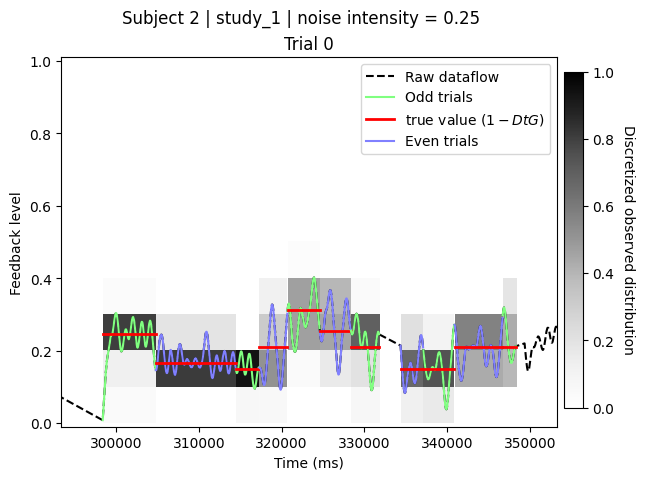

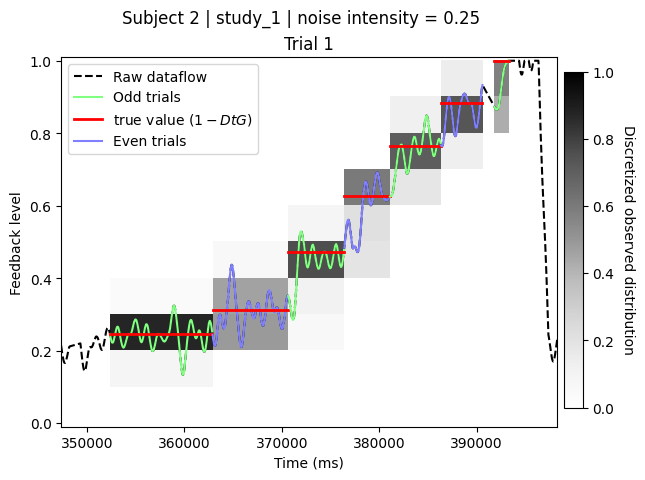

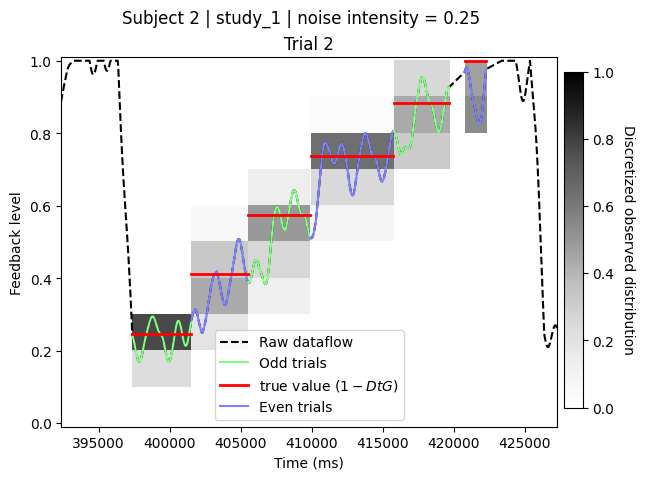

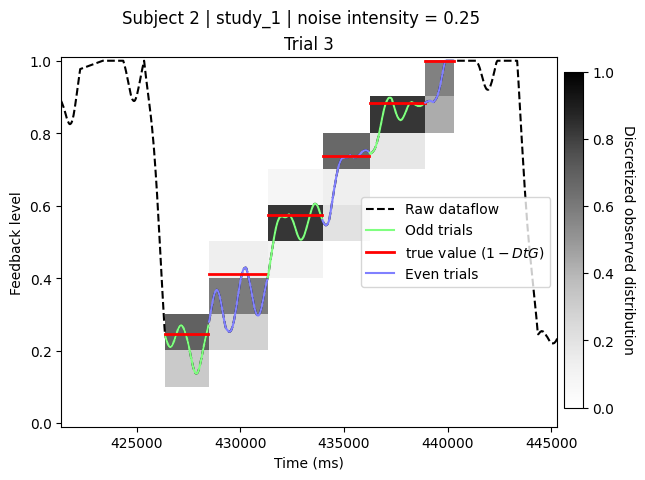

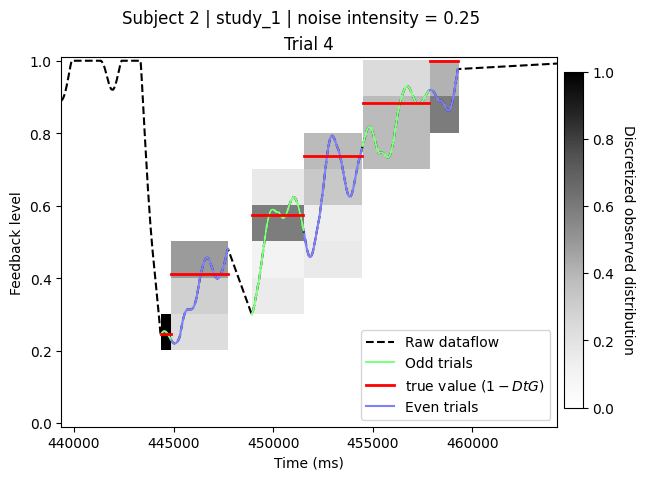

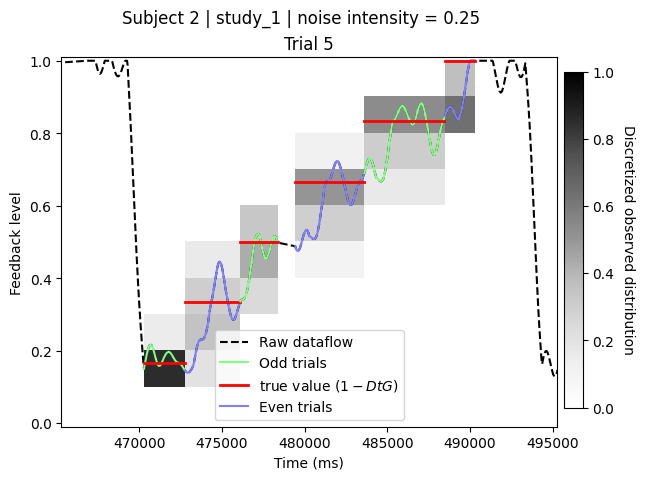

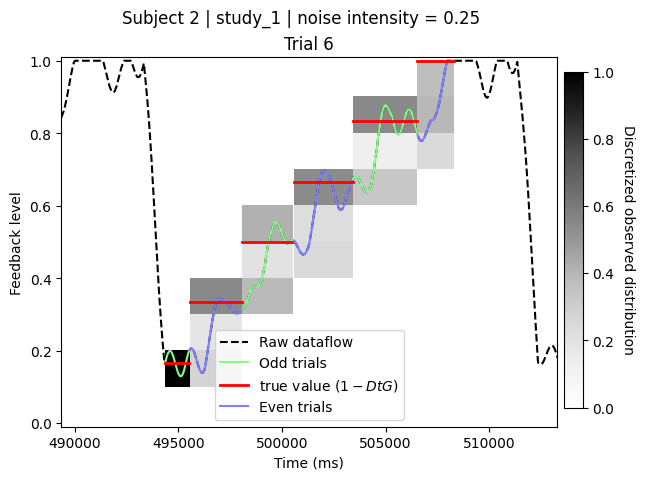

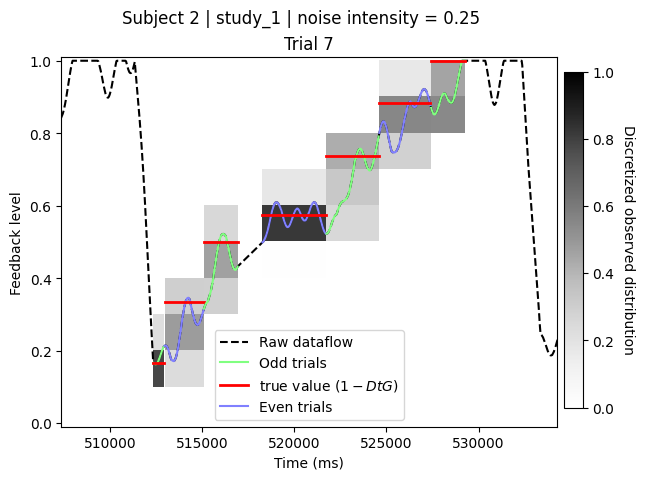

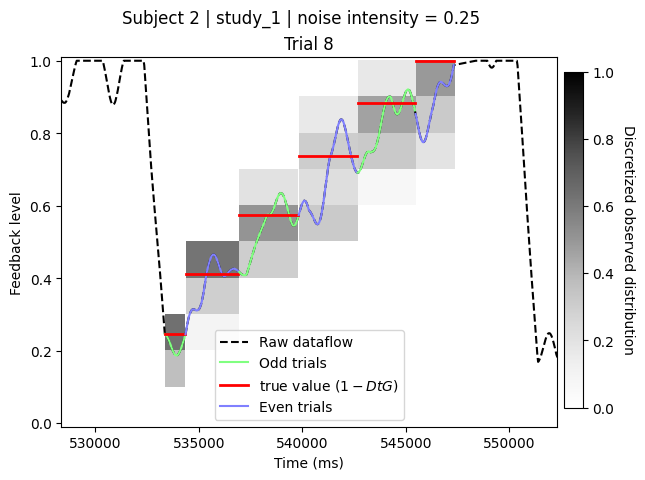

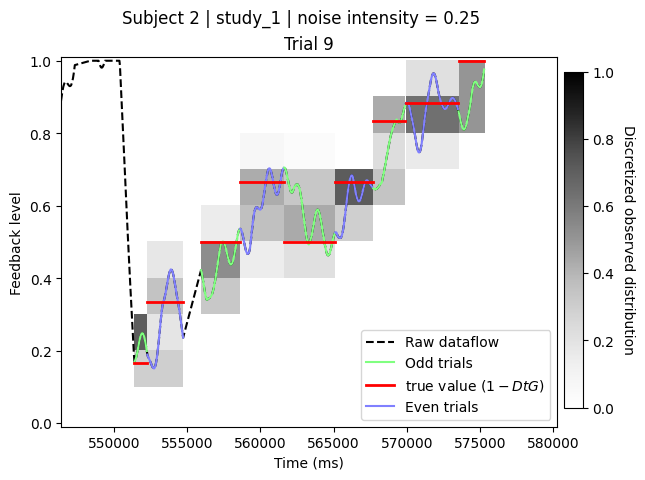

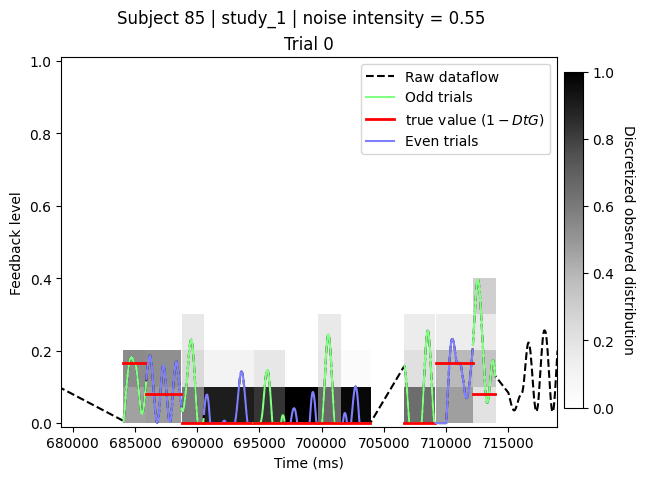

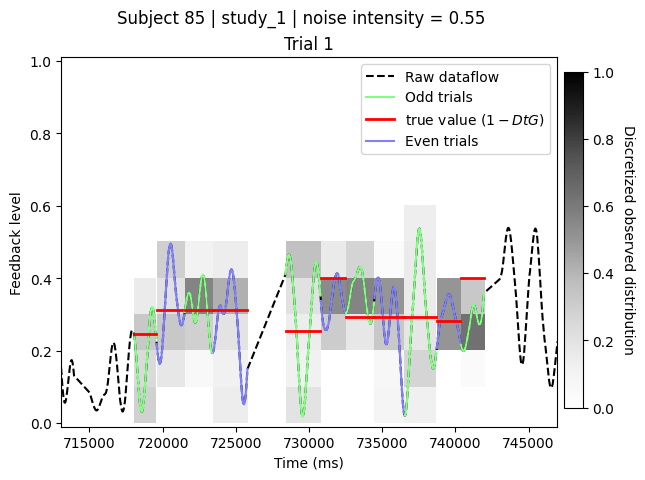

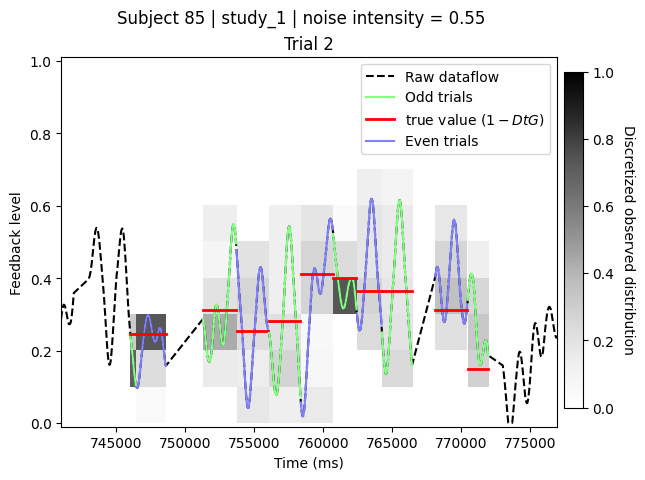

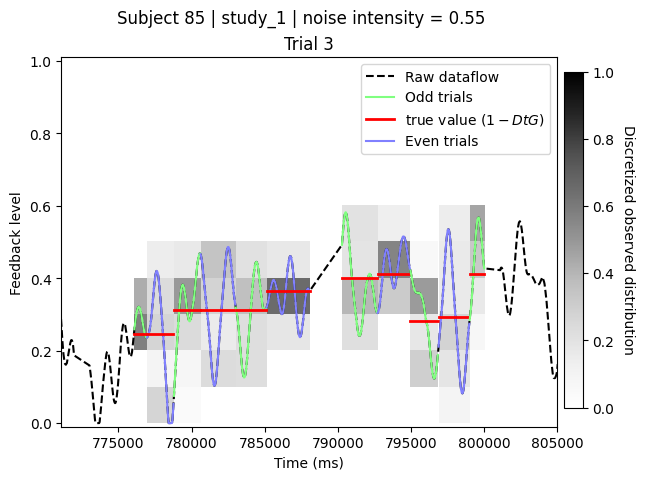

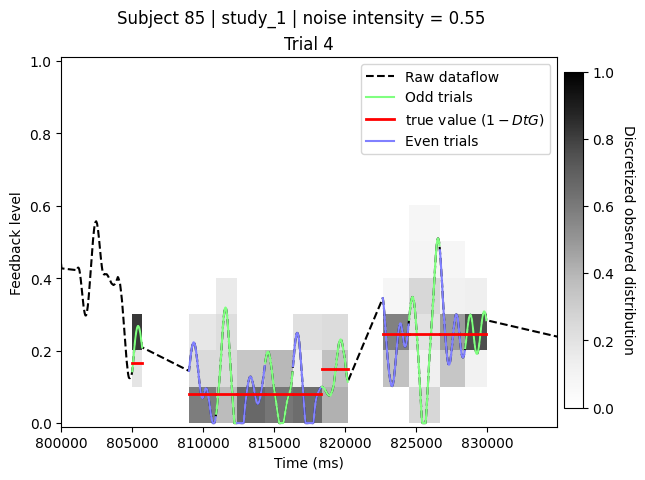

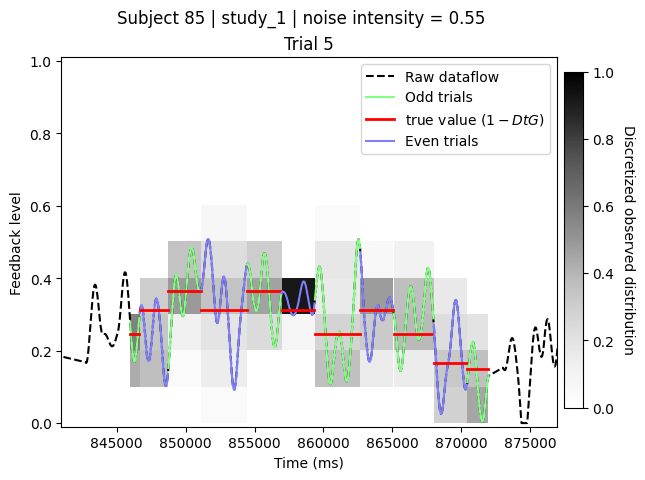

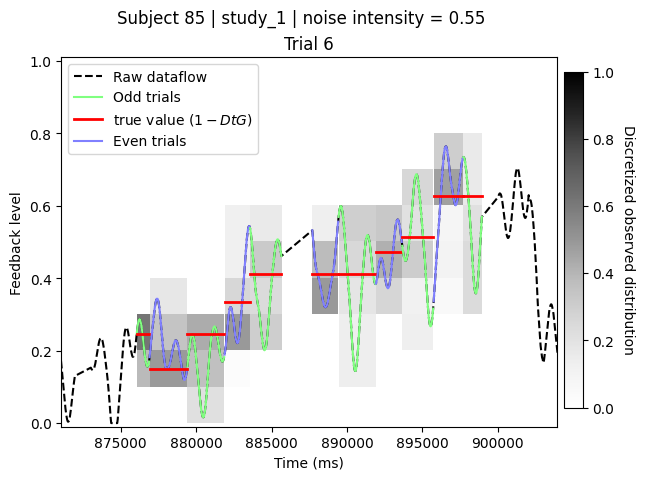

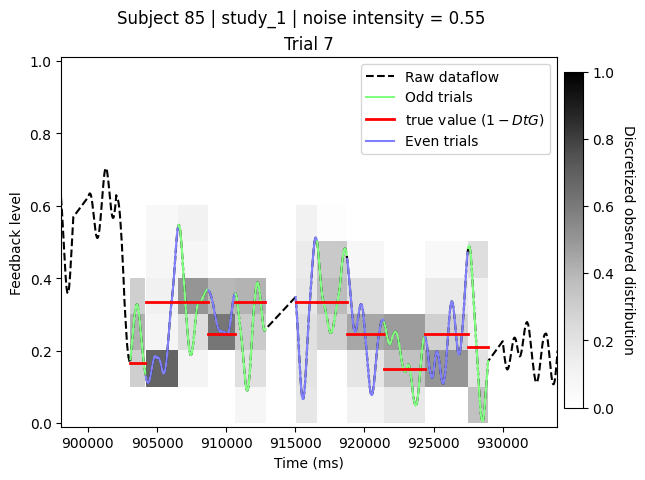

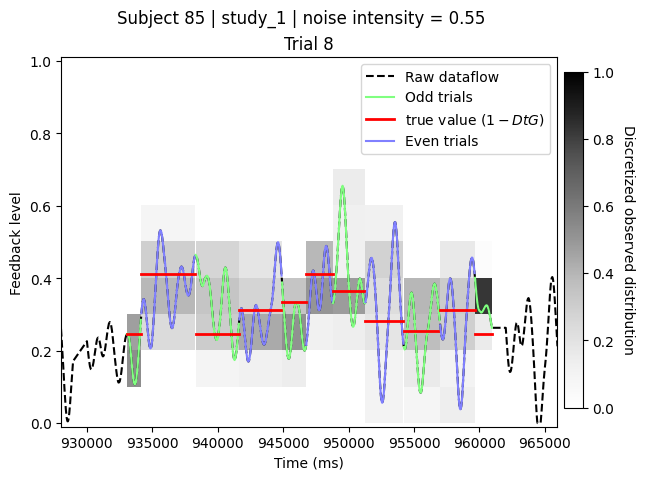

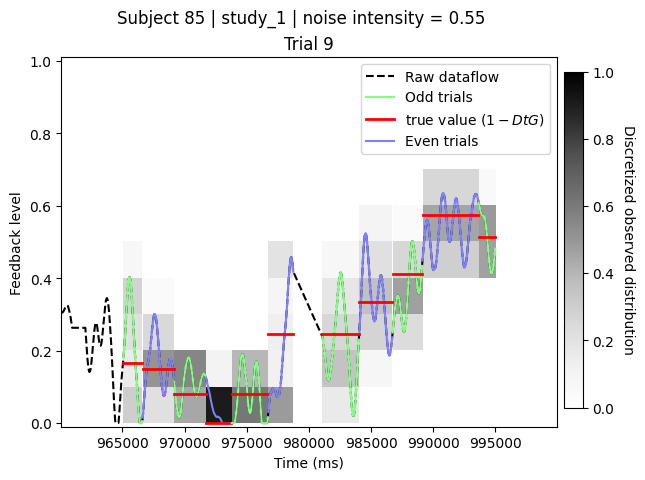

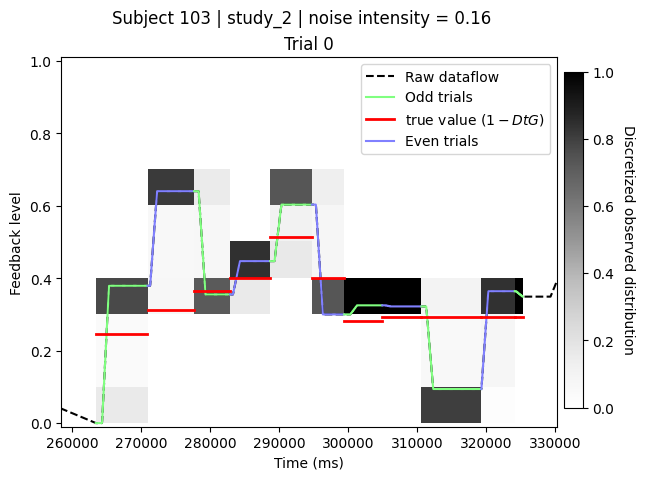

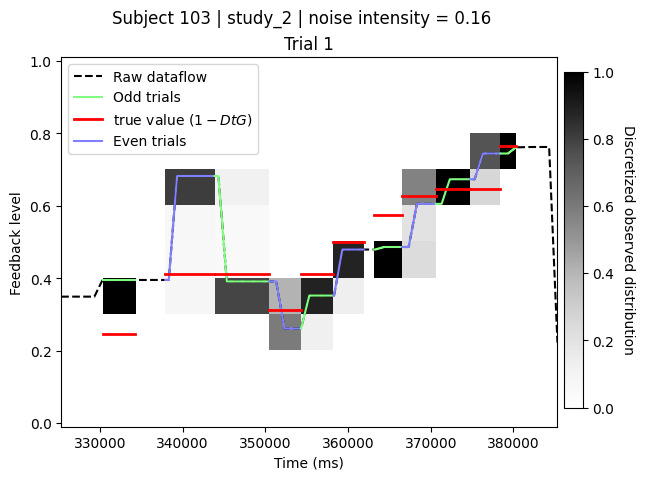

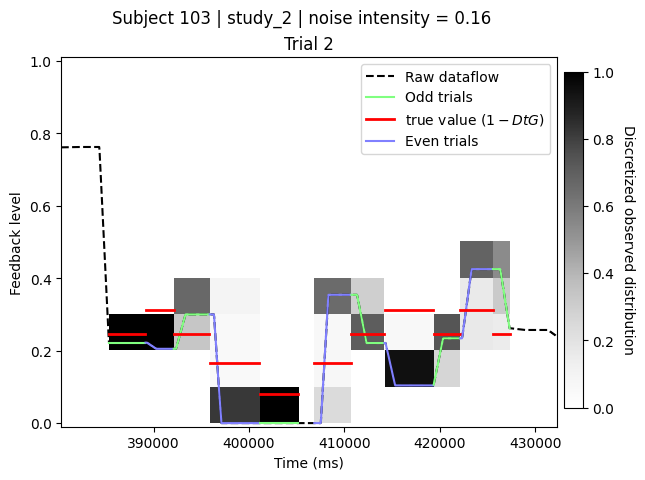

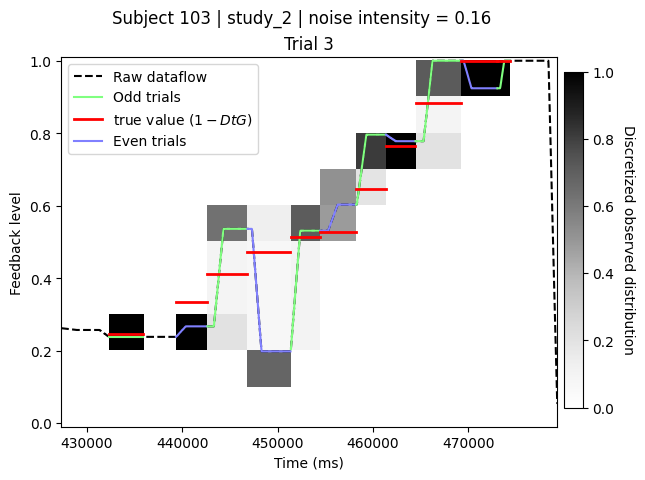

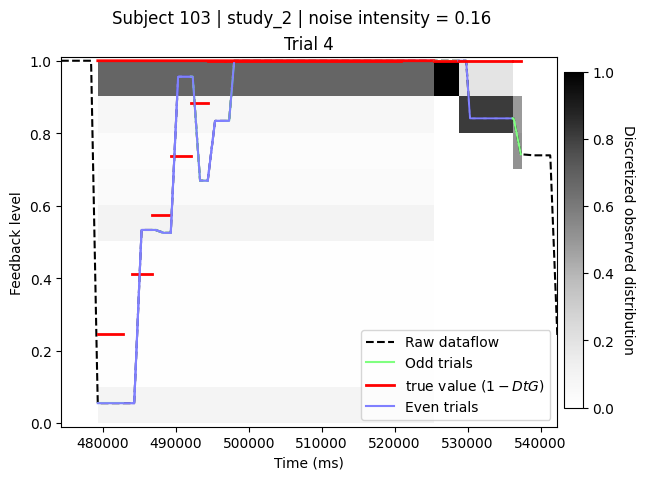

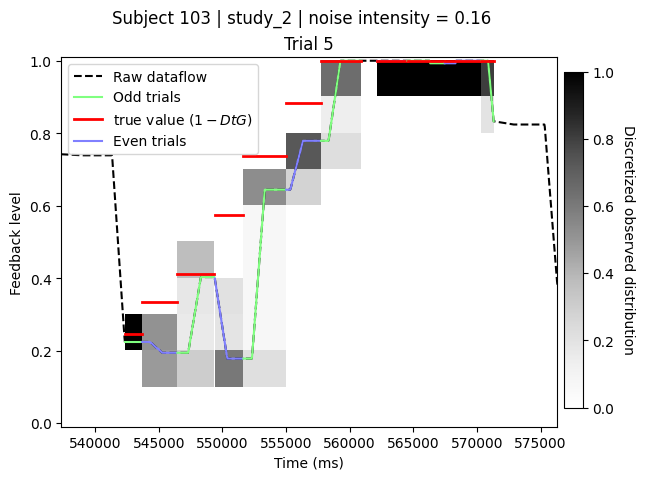

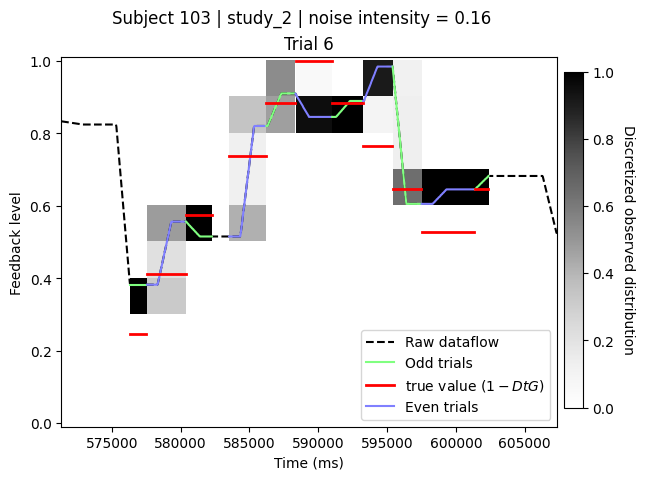

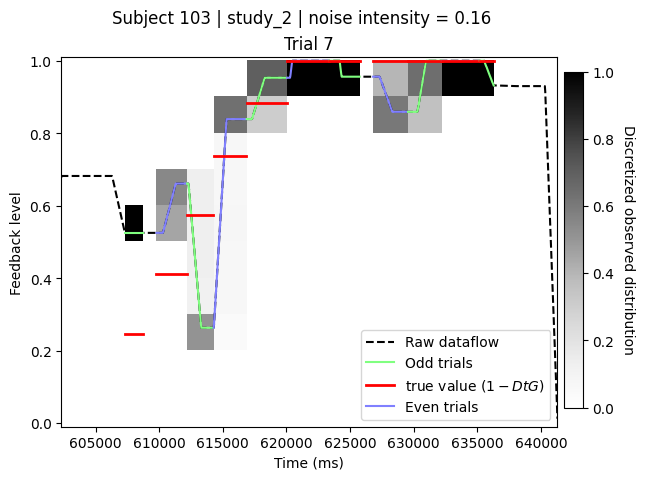

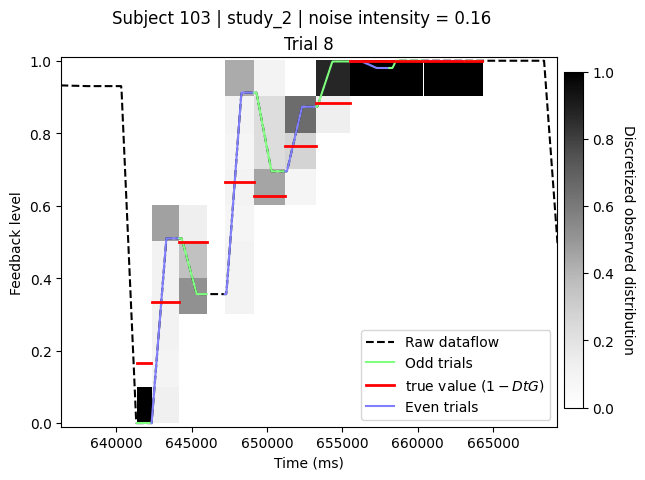

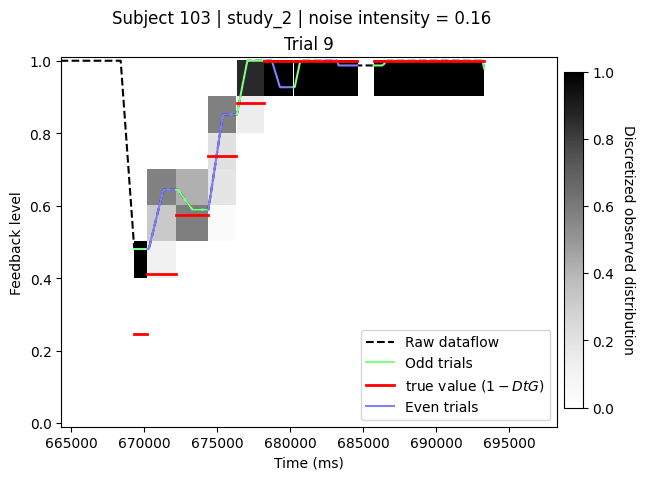

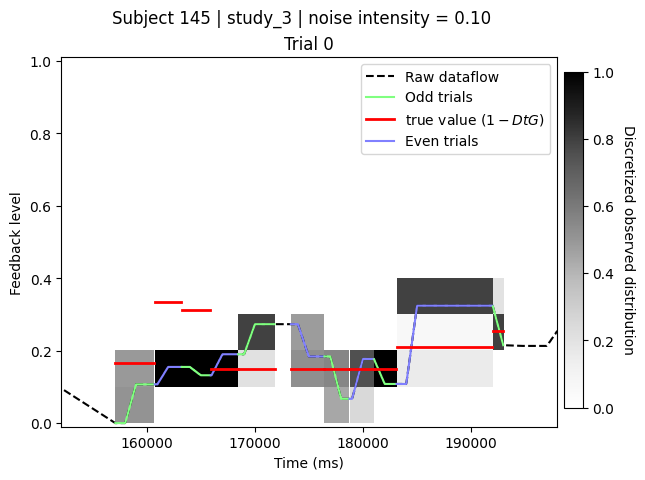

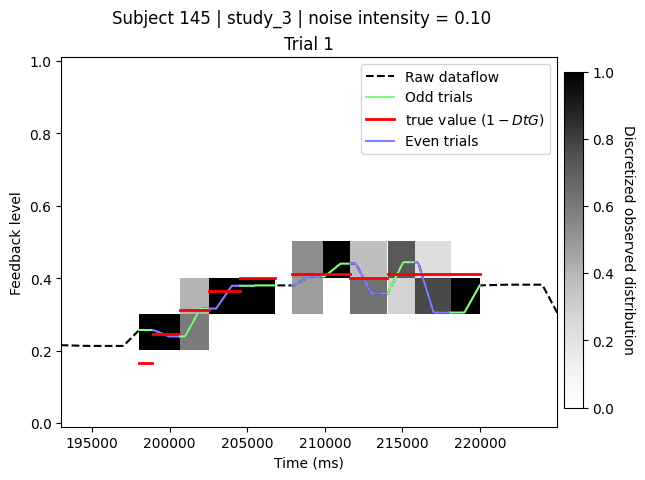

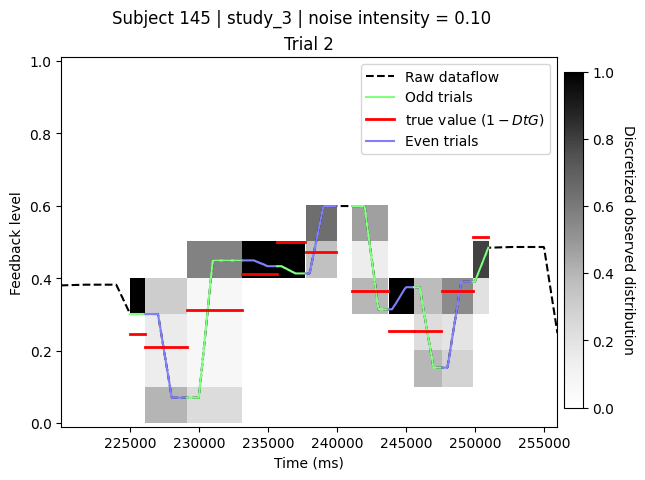

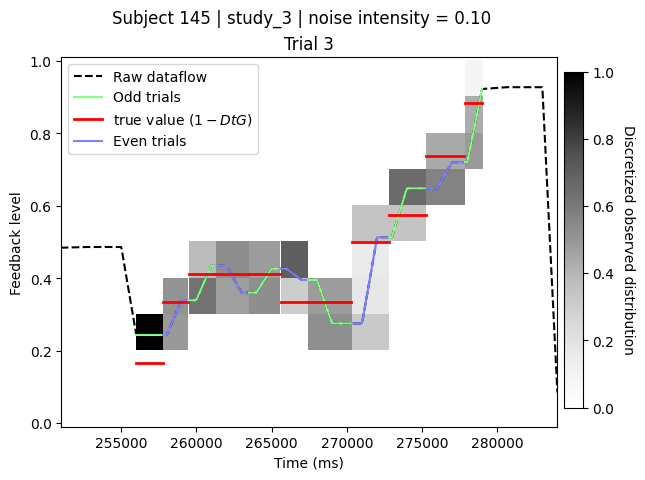

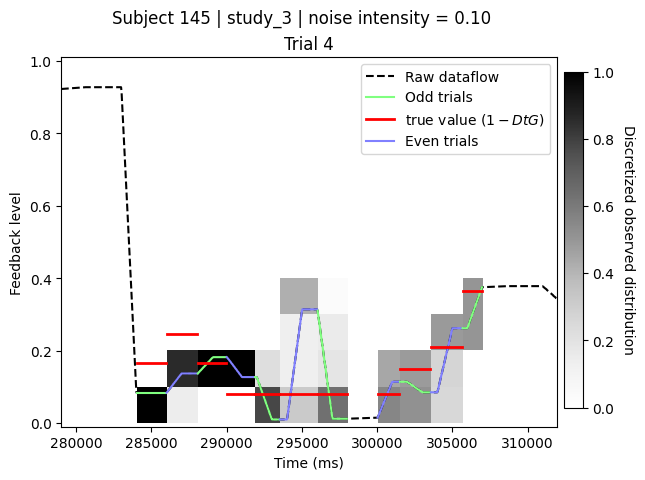

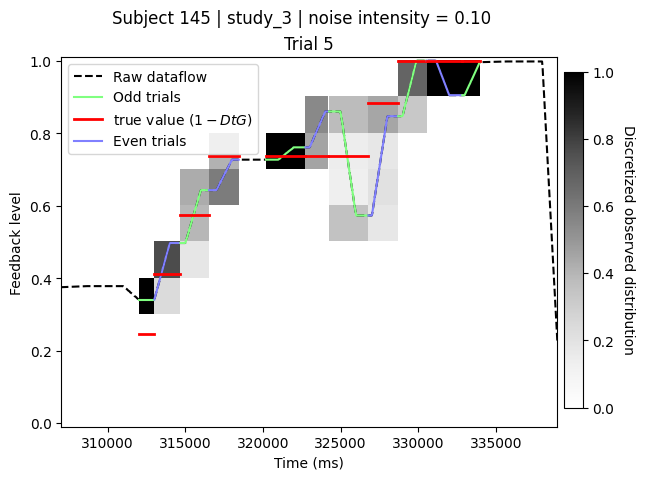

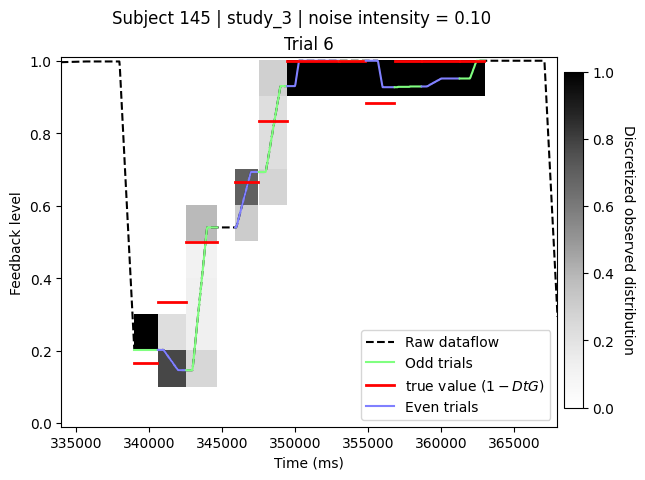

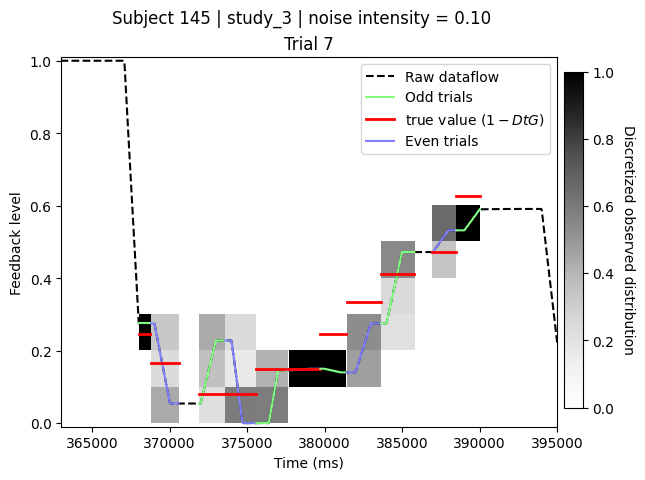

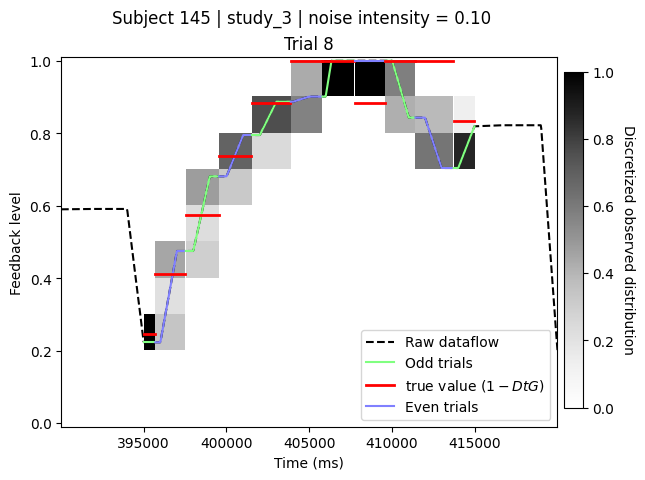

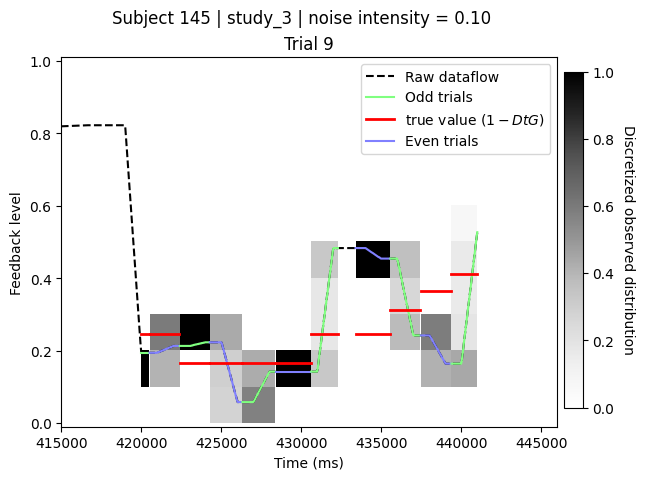

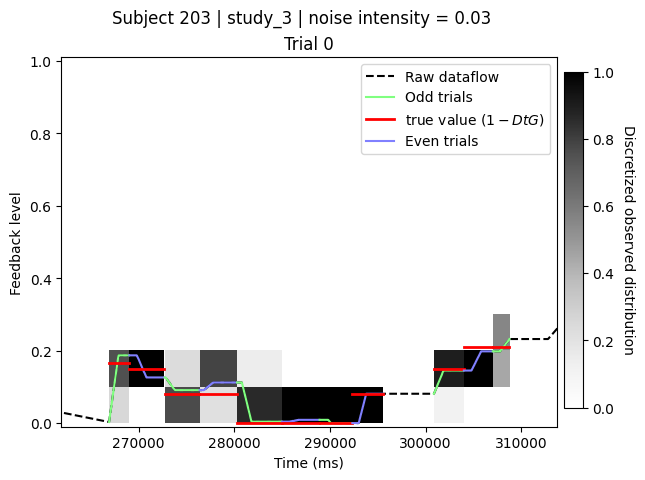

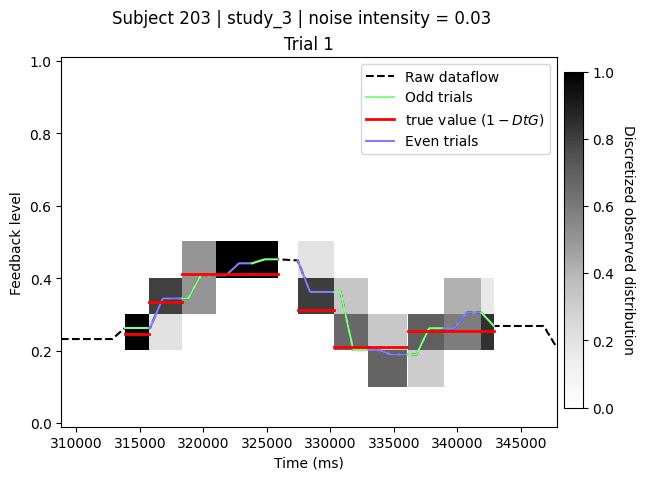

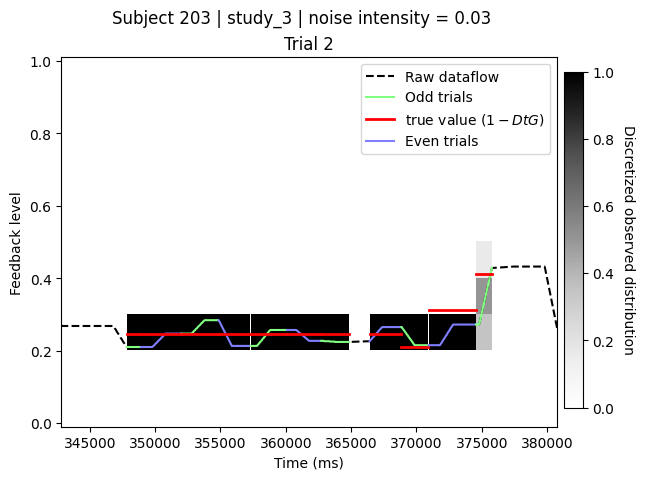

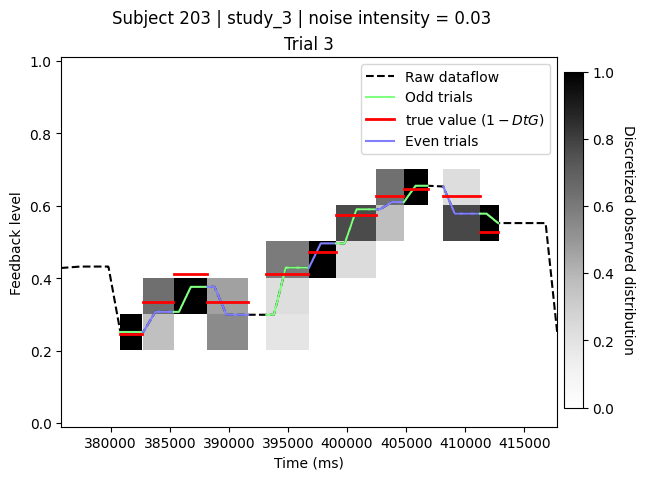

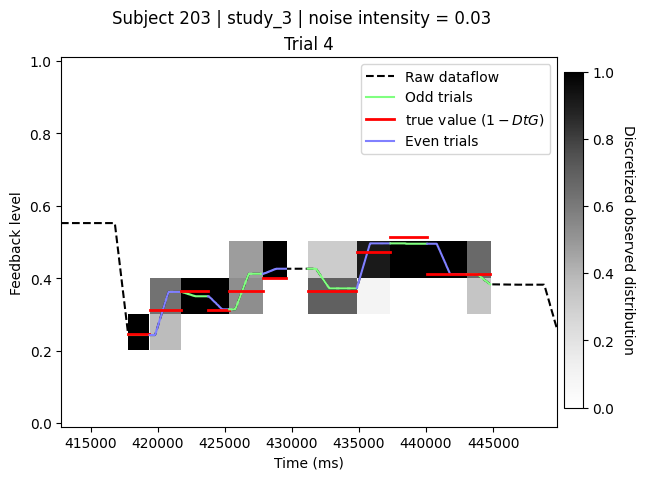

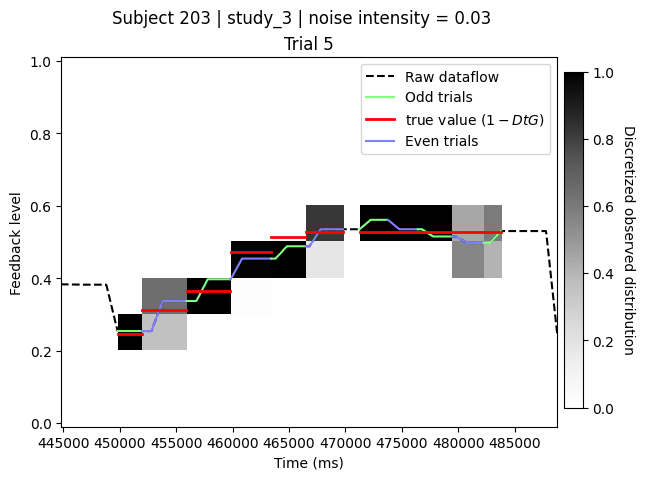

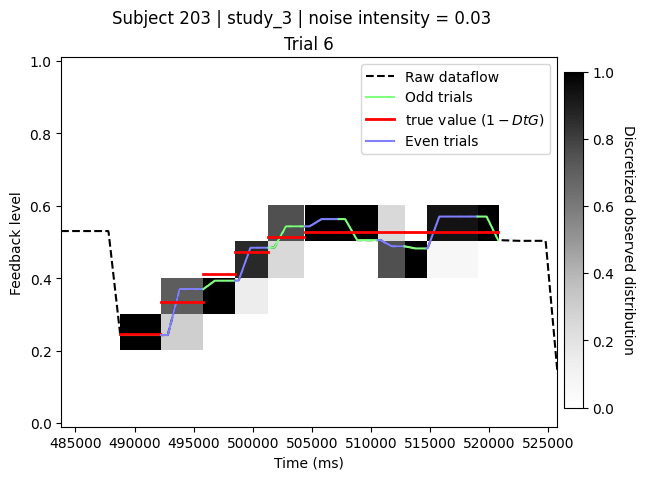

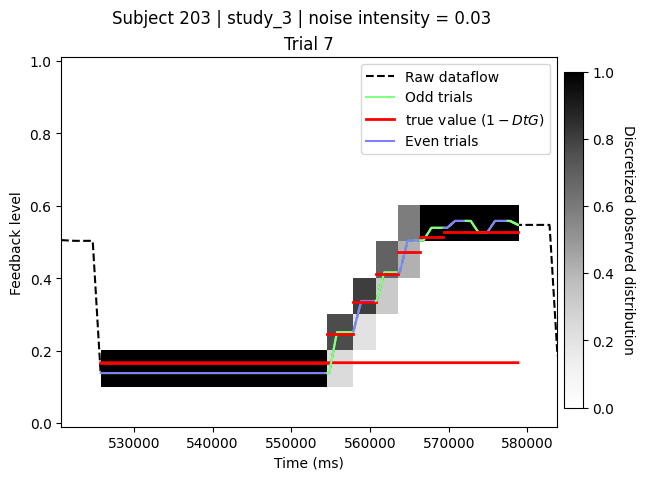

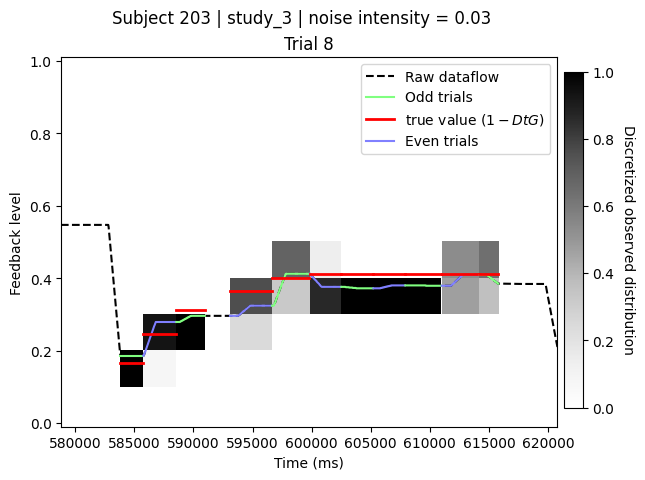

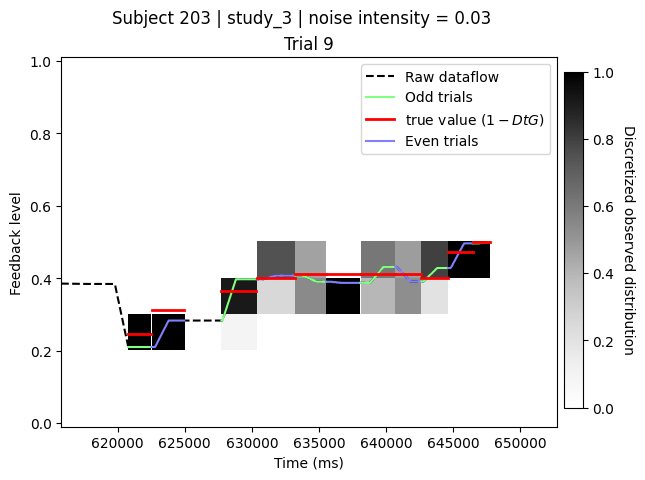

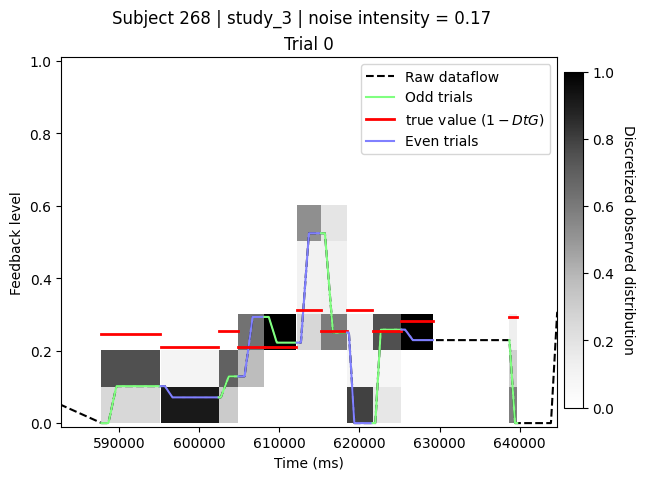

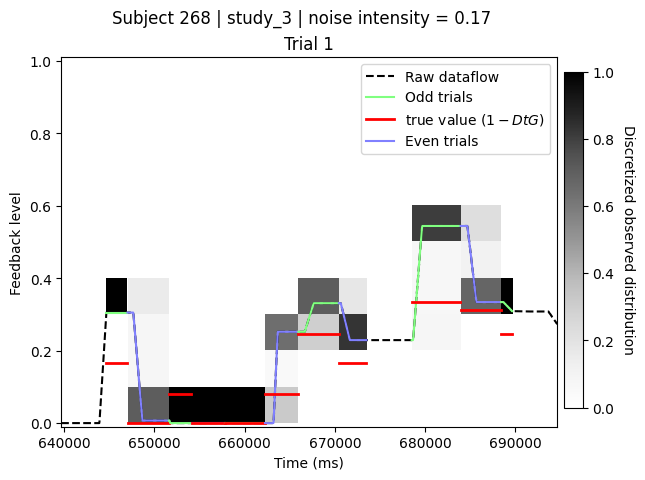

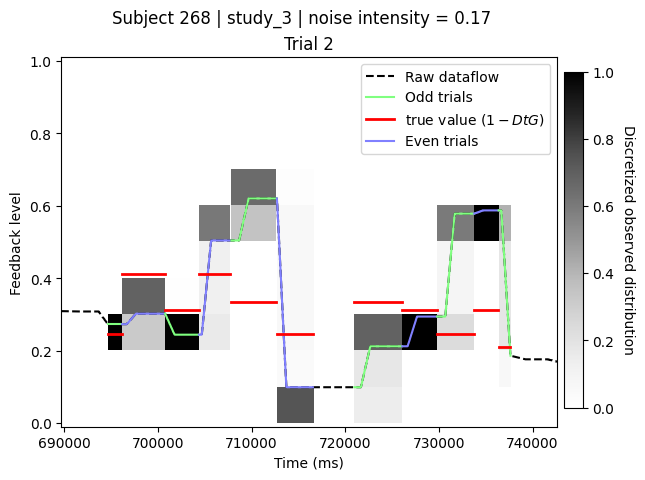

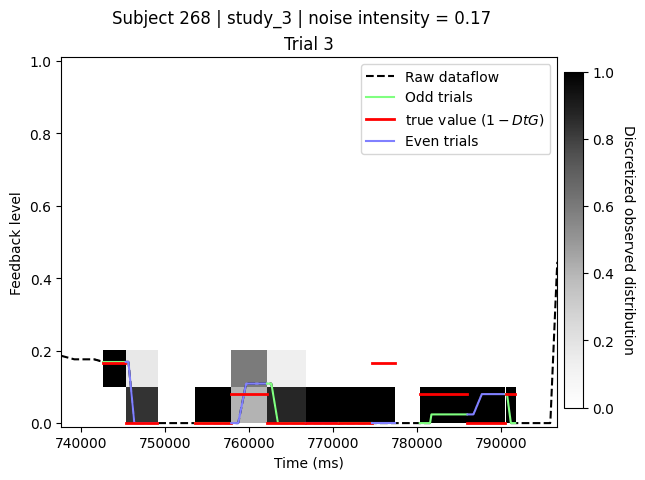

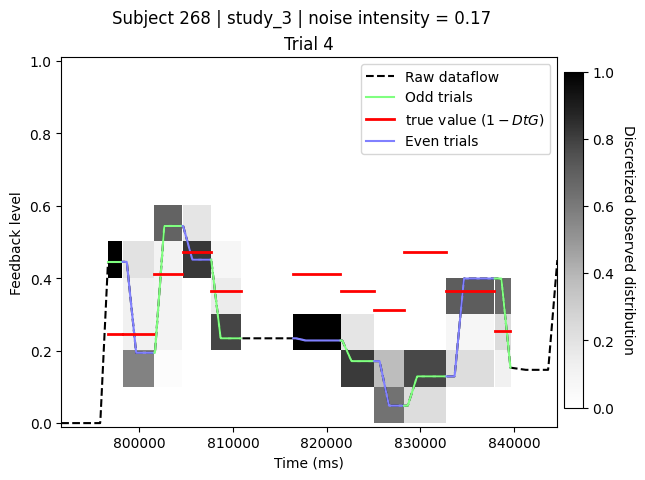

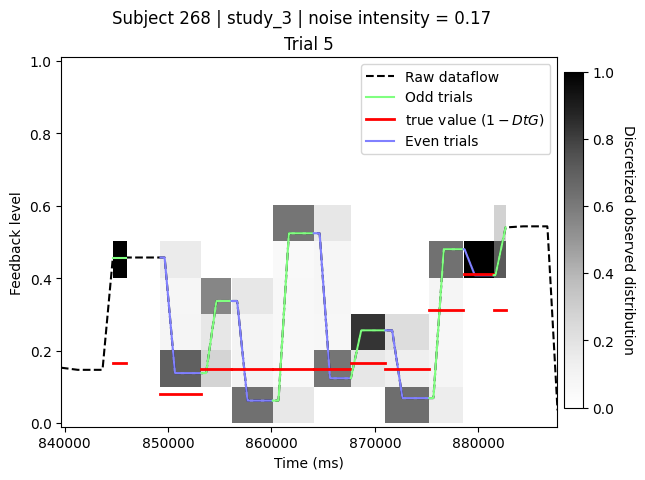

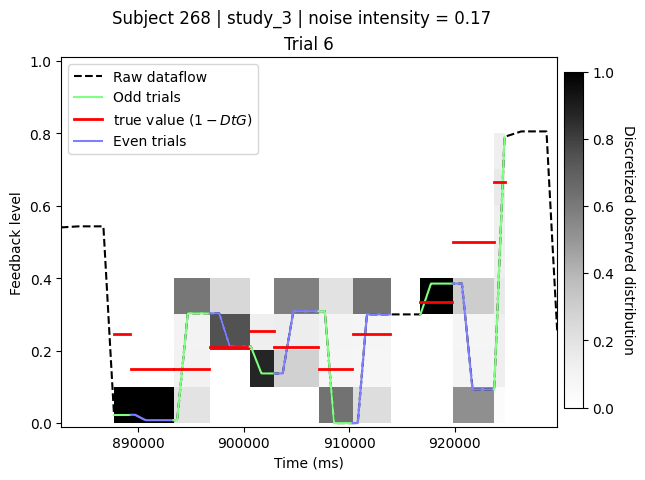

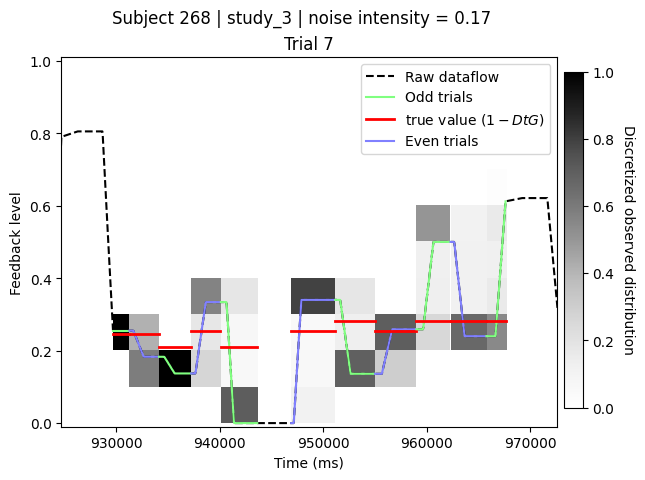

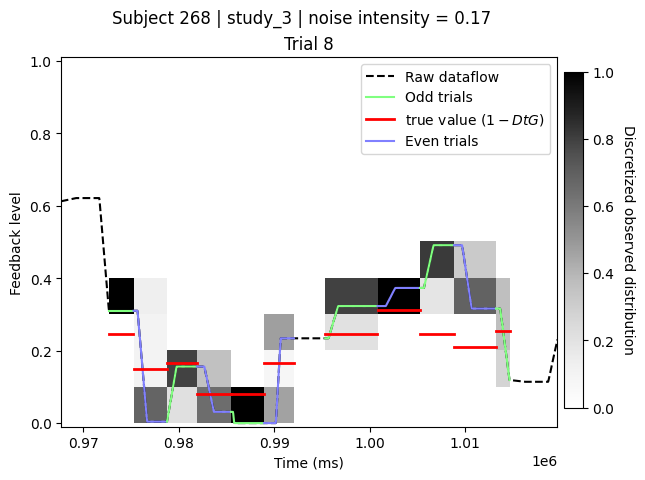

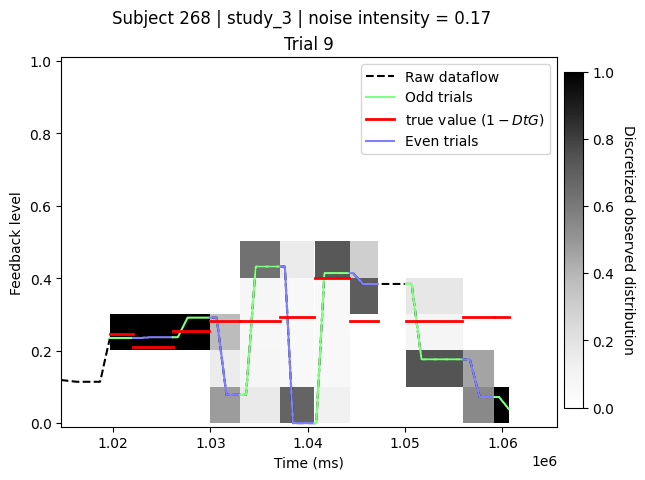

In [3]:
from analysis_tools.decompose_feedback import get_all_feedback_series,get_feedback_differences,decompose_real_time_feedback


feedback_series = list(subjects_df["realtime_values"])
feedback_series_raw = list(subjects_df["raw_realtime_values"])
study_list = list(subjects_df["study_name"])
noise_intensities = list(subjects_df["feedback_noise_std"])
true_dtgs = list(subjects_df["norm_distance_to_goal"])

N_FB_BINS = 10
two_colors = [np.array([0.5,1.0,0.5]),np.array([0.5,0.5,1.0])]
selective_labels = ["Odd trials","Even trials"]


for object_idx in [2,85,103,145,203,268]:
    # For the plotting only
    
    
    study_name = study_list[object_idx]
    bools,seen_histogram,(scalar_means,dig_means) = decompose_real_time_feedback(feedback_series[object_idx],Nbins=N_FB_BINS)
    
    # Plot the true state of the gauge vs what we extract as individual time series based on 
    # measured timestamps :
    
    for trial_k,trial_fbs in enumerate(feedback_series[object_idx]):    
        minval = np.min(trial_fbs[0][:,0])
        for tstp in range(len(trial_fbs)):
            try :
                maxval = np.max(trial_fbs[tstp][:,0])
            except :
                # Nothing !
                pass
        
        fig,ax = plt.subplots(1)
        fig.suptitle("Subject {} | {} | noise intensity = {:.2f}".format(object_idx,study_name,noise_intensities[object_idx]))
        offset_y = 0.0  # Set it different to 0 to see the two plots 
        offset_x = 5000  
                        # To see the feedback levels before and after the points 
                        # (warning, it was not always shown to the subject !)
        
        # This is the raw signal we receive from the application :
        ax.plot(feedback_series_raw[object_idx][:,0],feedback_series_raw[object_idx][:,1]+offset_y,color="black",linestyle="--",label="Raw dataflow")
        
        for tmstp_k,tmstp_fbs in enumerate(trial_fbs):            
            if tmstp_fbs.shape[0]>0:
                
                one_wide_histogram = np.flip(np.expand_dims(seen_histogram[trial_k,tmstp_k],-1))
                    # Flipped to match the y dimension of our plot !

                im1 = ax.imshow(one_wide_histogram,extent=[tmstp_fbs[0,0],tmstp_fbs[-1,0],0,1.0], aspect="auto",cmap="Grays",vmax=1.0,vmin=0.0)
                
                tmstp_color = two_colors[tmstp_k%2]
                tmstp_label = selective_labels[tmstp_k%2]
                ax.plot(tmstp_fbs[:,0],tmstp_fbs[:,1],color=tmstp_color,label=tmstp_label)
                ax.plot(tmstp_fbs[:,0],np.full_like(tmstp_fbs[:,0],1.0-true_dtgs[object_idx][trial_k,tmstp_k]),color="red",lw=2,label='true value ($1-DtG$)')
                
            
        ax.set_xlim([minval-offset_x,maxval+offset_x])
        ax.set_ylim([0-0.01,1.0+0.01])
        ax.set_xlabel("Time (ms)")
        ax.set_ylabel("Feedback level")
        ax.set_title("Trial {}".format(trial_k))
        
        # https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend :)
        ax.legend(*[*zip(*{l:h for h,l in zip(*ax.get_legend_handles_labels())}.items())][::-1])
        
        # Adding a colorbar to the figure, not to individual subplots
        cbar_ax = fig.add_axes([0.91, 0.15, 0.03, 0.7])  # [left, bottom, width, height]
        cbar = fig.colorbar(im1, cax=cbar_ax)
        cbar.set_label('Discretized observed distribution', rotation=270, labelpad=15)

        fig.show()

289 x 10 x 11 x (99, 3)
(289, 10, 9)
[3 3 3 3 3 3 3 3 3]
(289, 10, 9)
Recording 24965 feedback observations other a total 26010. (95.98231449442522 %)


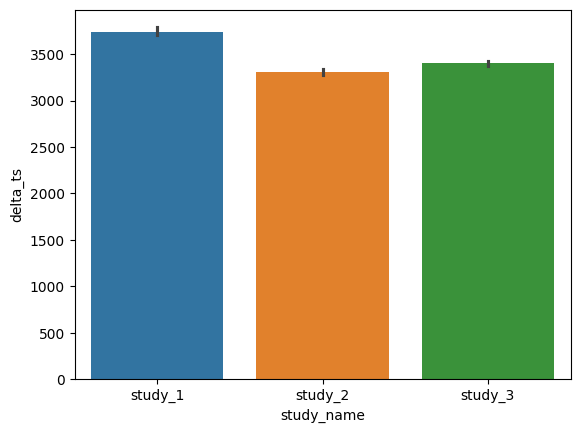

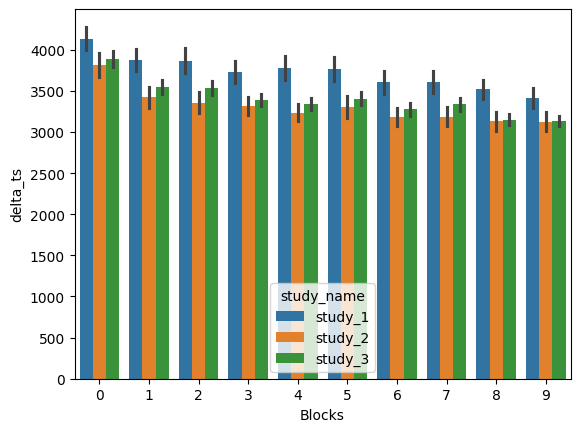

943.0


C:\Users\annic\AppData\Local\Temp\ipykernel_11328\3653777737.py:53: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\annic\AppData\Local\Temp\ipykernel_11328\3653777737.py:63: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


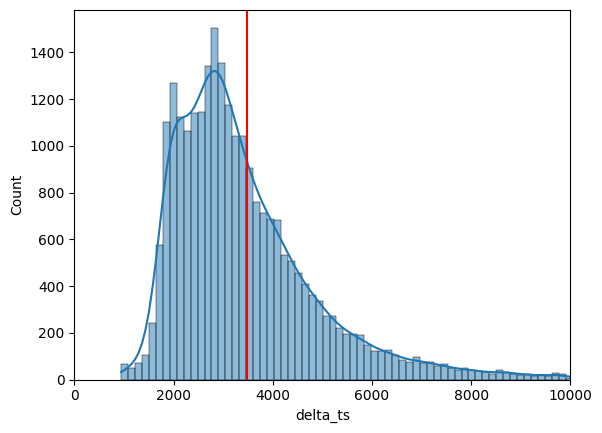

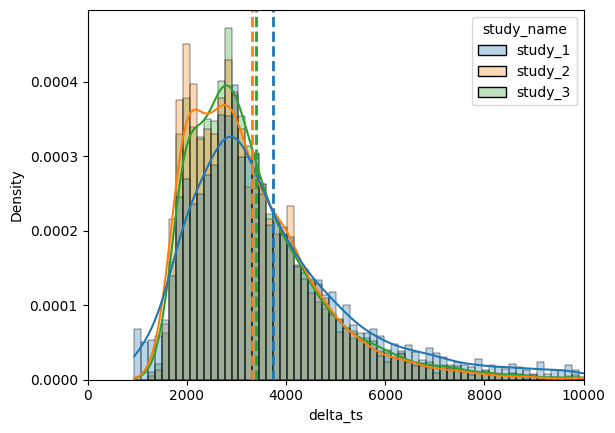

Time : study_1 ShapiroResult(statistic=np.float64(0.8525597052289483), pvalue=np.float64(1.0777285927623898e-62))
Logtime : study_1 ShapiroResult(statistic=np.float64(0.9924715936439876), pvalue=np.float64(7.793690012702122e-19))
Time : study_2 ShapiroResult(statistic=np.float64(0.8593939653767916), pvalue=np.float64(7.176207543622389e-55))
Logtime : study_2 ShapiroResult(statistic=np.float64(0.9806019604145348), pvalue=np.float64(1.858328074741935e-25))
Time : study_3 ShapiroResult(statistic=np.float64(0.8370905870466598), pvalue=np.float64(4.76285400422009e-78))
Logtime : study_3 ShapiroResult(statistic=np.float64(0.9795076659521715), pvalue=np.float64(2.233124574017996e-39))


c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 7010.
  res = hypotest_fun_out(*samples, **kwds)
c:\Users\annic\OneDrive\Bureau\MainPhD\code\behavioural_exp_code\exploit_results_env\lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13019.
  res = hypotest_fun_out(*samples, **kwds)


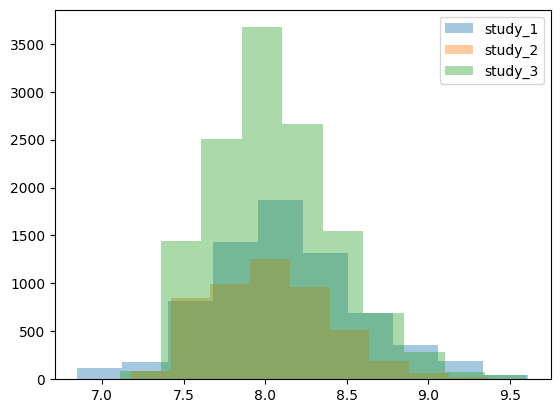

[3397. 2129. 1976. ... 5413. 6666. 5630.]
Kruskal Wallis test :
H-statistic: 148.1582510559174, p-value: 6.577331242606952e-32

Post-hoc Dunn's test :
              1             2             3
1  1.000000e+00  8.130915e-30  1.309669e-25
2  8.130915e-30  1.000000e+00  2.412319e-03
3  1.309669e-25  2.412319e-03  1.000000e+00


In [8]:
copy_df = subjects_df[["realtime_values","study_name"]].copy()
feedback_series_list = list(copy_df["realtime_values"])
print(length(feedback_series))

def deltat_if_exists(_series):
    if _series.shape[0] > 0 :
        deltat = _series[-1,0] - _series[0,0]
    else :
        deltat = None
    return deltat
deltas = [[[deltat_if_exists(__s) for __s in _trial_series] for _trial_series in subj_series] for subj_series in feedback_series_list]

np_deltas = np.stack(deltas)[:,:,1:-1]
np_deltas[np_deltas==None] = 0


print(np_deltas.shape)
copy_df["delta_ts"] = list(np_deltas)


# Trials : 
trial_counters = np.repeat(np.repeat(np.expand_dims(np.arange(10),(0,-1)),np_deltas.shape[-1],-1),np_deltas.shape[0],0)
print(trial_counters[0,3])
print(trial_counters.shape)
copy_df["trials"] = list(trial_counters)



# Explode so that we have one delta_t for each action
exploded_df = copy_df.explode(['trials',"delta_ts"],ignore_index=True).explode(['trials',"delta_ts"],ignore_index=True)
filtered_exploded_df = exploded_df[(exploded_df["delta_ts"]>1)&(exploded_df["delta_ts"]<15000)] # Only the actually observed

n_exploded = exploded_df["delta_ts"].shape[0]
n_filter = filtered_exploded_df["delta_ts"].shape[0]
print("Recording {} feedback observations other a total {}. ({} %)".format(n_filter,n_exploded,100*n_filter/n_exploded))

sns.barplot(data= filtered_exploded_df,x="study_name",y="delta_ts",hue='study_name')
plt.show()

sns.barplot(data= filtered_exploded_df,x="trials",y="delta_ts",hue='study_name')
plt.xlabel("Blocks")
plt.show()


print(min(filtered_exploded_df["delta_ts"]))



fig,ax = plt.subplots(1,1)
sns.histplot(ax=ax,data= filtered_exploded_df,x="delta_ts",bins=100,kde=True)
ax.set_xlim([0,10000])
ax.axvline(np.mean(filtered_exploded_df["delta_ts"]),color="red")
fig.show()


fig,ax = plt.subplots(1,1)
palette = sns.color_palette("tab10")
sns.histplot(ax=ax,data= filtered_exploded_df,x="delta_ts",hue="study_name",stat='density',common_norm=False,bins=100,kde=True,alpha=0.3)
ax.set_xlim([0,10000])
for i, category in enumerate(filtered_exploded_df["study_name"].unique()):
    mean_value = filtered_exploded_df[filtered_exploded_df["study_name"] == category]["delta_ts"].mean()
    ax.axvline(mean_value, color=palette[i], linestyle="dashed", linewidth=2, label=f"{category} Mean")
fig.show()


plt.show()


# Between condition testing ! 

from scipy.stats import shapiro

# Plotting and difference testing for study 3 :

# FInal performance : differences between experimental groups :
final_times_by_group = list(filtered_exploded_df.groupby('study_name')['delta_ts'])       
final_times_by_group_dict = {cat:np.array(perfs).astype(float) for (cat,perfs) in final_times_by_group}                      


# The data have not been generated by a normal distribution ! 
for noise_category,subject_array in  final_times_by_group_dict.items():
    # logtime = np.log(subject_array.astype(float))
    normality = shapiro(subject_array)
    print("Time :",noise_category,normality)
    
    
    logtime = np.log(subject_array.astype(float))
    normality = shapiro(logtime)
    print("Logtime :",noise_category,normality)
    plt.hist(logtime,10,alpha=0.4,label =noise_category)
plt.legend()
plt.show()





from scipy.stats import kruskal

# Example: Comparing A, B, and C
print(final_times_by_group_dict["study_1"])
h_stat, p_value = kruskal(final_times_by_group_dict["study_1"],final_times_by_group_dict["study_2"],final_times_by_group_dict["study_3"],'raise')

print("Kruskal Wallis test :")
print(f"H-statistic: {h_stat}, p-value: {p_value}")


import scikit_posthocs as sp
p_values = sp.posthoc_dunn([final_times_by_group_dict["study_1"],final_times_by_group_dict["study_2"],final_times_by_group_dict["study_3"]], p_adjust = 'bonferroni')

print("\nPost-hoc Dunn's test :")
print(p_values)